<a href="https://colab.research.google.com/github/benvictoria17/MachineLearning/blob/master/stroke_prediction_classification_knn_and_rfr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/MachineLearning/master/dataset/%20Stroke%20Prediction%20Dataset/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df[df['stroke']==1].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,249.000000,249.000000,249.000000,249.000000,249.000000,209.000000,249.0
mean,37115.068273,67.728193,0.265060,0.188755,132.544739,30.471292,1.0
std,21993.344872,12.727419,0.442254,0.392102,61.921056,6.329452,0.0
min,210.000000,1.320000,0.000000,0.000000,56.110000,16.900000,1.0
25%,17013.000000,59.000000,0.000000,0.000000,79.790000,26.400000,1.0
50%,36706.000000,71.000000,0.000000,0.000000,105.220000,29.700000,1.0
75%,56669.000000,78.000000,1.000000,0.000000,196.710000,33.700000,1.0
max,72918.000000,82.000000,1.000000,1.000000,271.740000,56.600000,1.0


In [7]:
df[df['stroke']==0].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4861.000000,4861.000000,4861.000000,4861.000000,4861.000000,4700.000000,4861.0
mean,36487.236371,41.971545,0.088871,0.047110,104.795513,28.823064,0.0
std,21120.133386,22.291940,0.284586,0.211895,43.846069,7.908287,0.0
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.0
25%,17762.000000,24.000000,0.000000,0.000000,77.120000,23.400000,0.0
50%,36958.000000,43.000000,0.000000,0.000000,91.470000,28.000000,0.0
75%,54497.000000,59.000000,0.000000,0.000000,112.830000,33.100000,0.0
max,72940.000000,82.000000,1.000000,1.000000,267.760000,97.600000,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9b42b39d0>,
      dtype=object)

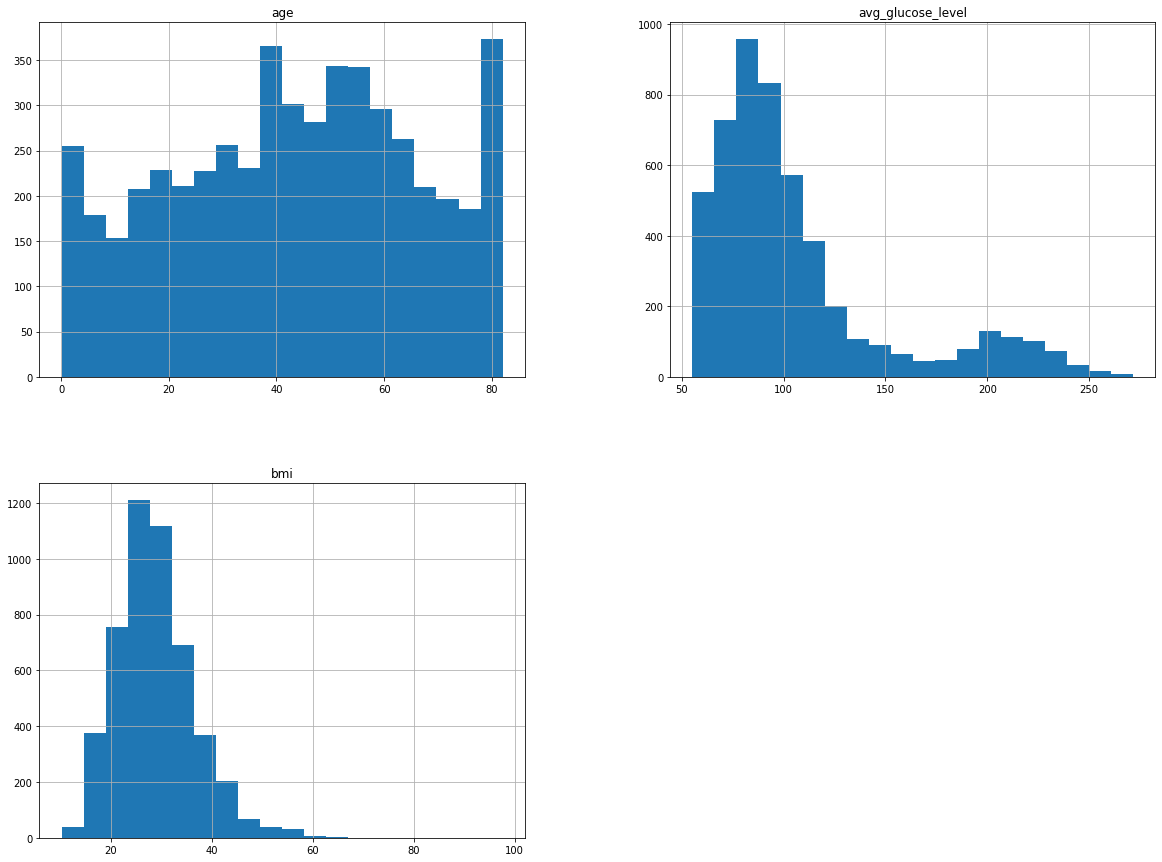

In [8]:
atttibutes_hist = df[["age", "avg_glucose_level", "bmi"]].hist(bins=20, figsize=(20,15))
atttibutes_hist

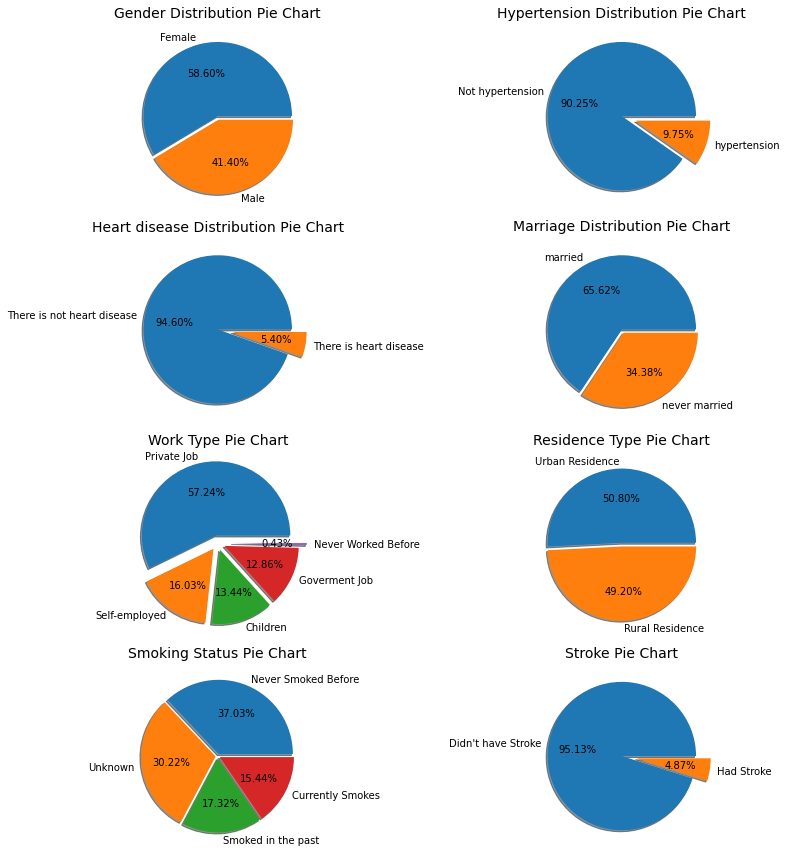

In [9]:
fig, ax = plt.subplots(4,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = ax

labels = df['gender'].value_counts().index.tolist()[:2]
values = df['gender'].value_counts().tolist()[:2]
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax1.set_title("Gender Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Not hypertension", "hypertension"]
values = df['hypertension'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax2.set_title("Hypertension Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["There is not heart disease", "There is heart disease"]
values = df['heart_disease'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax3.set_title("Heart disease Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["married", "never married"]
values = df['ever_married'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax4.set_title("Marriage Distribution Pie Chart", fontdict={'fontsize': 14})

labels = ["Private Job", "Self-employed", "Children", "Goverment Job", "Never Worked Before"]
values = df['work_type'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.2])
ax5.set_title("Work Type Pie Chart", fontdict={'fontsize': 14})

labels = ["Urban Residence", "Rural Residence"]
values = df['Residence_type'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.05])
ax6.set_title("Residence Type Pie Chart", fontdict={'fontsize': 14})

labels = ["Never Smoked Before", "Unknown", "Smoked in the past", "Currently Smokes"]
values = df['smoking_status'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.03, 0.03, 0.03, 0.03])
ax7.set_title("Smoking Status Pie Chart", fontdict={'fontsize': 14})

labels = ["Didn't have Stroke", "Had Stroke"]
values = df['stroke'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
ax8.set_title("Stroke Pie Chart", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

In [10]:
bmi_mean = df["bmi"].mean()
df['bmi'].fillna(bmi_mean, inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
print(df['gender'].value_counts())
df = df[df['gender'] != "Other"]

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


In [12]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [13]:
df_copy = df.copy()
df_result = pd.get_dummies(df_copy, columns=['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], prefix=['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] )
df_result.rename(columns={"hypertension_0": "no_hypertension", "hypertension_1": "yes_hypertension", "heart_disease_0": "no_heart_disease", "heart_disease_1": "yes_heart_disease"}, inplace=True)
print(df_result.columns.tolist())
df_result

['id', 'age', 'avg_glucose_level', 'bmi', 'stroke', 'no_hypertension', 'yes_hypertension', 'no_heart_disease', 'yes_heart_disease', 'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


,id,age,avg_glucose_level,bmi,stroke,no_hypertension,yes_hypertension,no_heart_disease,yes_heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.600000,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,202.21,28.893237,1,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.500000,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,171.23,34.400000,1,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,174.12,24.000000,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,28.893237,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,125.20,40.000000,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,82.99,30.600000,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,166.29,25.600000,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [14]:
df_result.corr()

,id,age,avg_glucose_level,bmi,stroke,no_hypertension,yes_hypertension,no_heart_disease,yes_heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,1.000000,0.003677,0.000943,0.003153,0.006430,-0.003610,0.003610,0.001253,-0.001253,-0.001929,0.001929,-0.013944,0.013944,0.000054,0.005471,0.023545,-0.019879,-0.013869,0.001219,-0.001219,-0.019126,0.007419,0.011567,0.001081
age,0.003677,1.000000,0.238323,0.325858,0.245239,-0.276367,0.276367,-0.263777,0.263777,0.027752,-0.027752,-0.679084,0.679084,0.129965,-0.078667,0.116678,0.327949,-0.634320,-0.014031,0.014031,-0.378366,0.237347,0.119207,0.073075
avg_glucose_level,0.000943,0.238323,1.000000,0.168910,0.131991,-0.174540,0.174540,-0.161907,0.161907,-0.054722,0.054722,-0.155329,0.155329,0.013908,-0.014665,0.016451,0.062770,-0.102195,0.004783,-0.004783,-0.095035,0.067796,0.024011,0.017716
bmi,0.003153,0.325858,0.168910,1.000000,0.038912,-0.160147,0.160147,-0.038862,0.038862,0.025606,-0.025606,-0.335563,0.335563,0.077885,-0.028612,0.204055,0.070756,-0.442945,0.000288,-0.000288,-0.265094,0.104674,0.106107,0.085516
stroke,0.006430,0.245239,0.131991,0.038912,1.000000,-0.127891,0.127891,-0.134905,0.134905,-0.009081,0.009081,-0.108299,0.108299,0.002660,-0.014885,0.011927,0.062150,-0.083888,-0.015415,0.015415,-0.055924,0.064683,-0.004163,0.008920
no_hypertension,-0.003610,-0.276367,-0.174540,-0.160147,-0.127891,1.000000,-1.000000,0.108292,-0.108292,0.021223,-0.021223,0.164187,-0.164187,-0.017661,0.021612,0.005358,-0.115417,0.129535,-0.007980,0.007980,0.141551,-0.059022,-0.065018,-0.031213
yes_hypertension,0.003610,0.276367,0.174540,0.160147,0.127891,-1.000000,1.000000,-0.108292,0.108292,-0.021223,0.021223,-0.164187,0.164187,0.017661,-0.021612,-0.005358,0.115417,-0.129535,0.007980,-0.007980,-0.141551,0.059022,0.065018,0.031213
no_heart_disease,0.001253,-0.263777,-0.161907,-0.038862,-0.134905,0.108292,-0.108292,1.000000,-1.000000,0.085685,-0.085685,0.114601,-0.114601,-0.001312,0.015715,-0.000068,-0.086742,0.091654,0.003045,-0.003045,0.066765,-0.066938,0.021893,-0.044030
yes_heart_disease,-0.001253,0.263777,0.161907,0.038862,0.134905,-0.108292,0.108292,-1.000000,1.000000,-0.085685,0.085685,-0.114601,0.114601,0.001312,-0.015715,0.000068,0.086742,-0.091654,-0.003045,0.003045,-0.066765,0.066938,-0.021893,0.044030
gender_Female,-0.001929,0.027752,-0.054722,0.025606,-0.009081,0.021223,-0.021223,0.085685,-0.085685,1.000000,-1.000000,-0.030171,0.030171,0.016598,-0.011486,0.032502,0.026045,-0.089226,-0.006105,0.006105,-0.059557,-0.043121,0.098952,-0.011408


In [15]:
corr_matrix = df_result.corr()
corr_matrix["stroke"].sort_values(ascending = False)

stroke                            1.000000
age                               0.245239
yes_heart_disease                 0.134905
avg_glucose_level                 0.131991
yes_hypertension                  0.127891
ever_married_Yes                  0.108299
smoking_status_formerly smoked    0.064683
work_type_Self-employed           0.062150
bmi                               0.038912
Residence_type_Urban              0.015415
work_type_Private                 0.011927
gender_Male                       0.009081
smoking_status_smokes             0.008920
id                                0.006430
work_type_Govt_job                0.002660
smoking_status_never smoked      -0.004163
gender_Female                    -0.009081
work_type_Never_worked           -0.014885
Residence_type_Rural             -0.015415
smoking_status_Unknown           -0.055924
work_type_children               -0.083888
ever_married_No                  -0.108299
no_hypertension                  -0.127891
no_heart_di

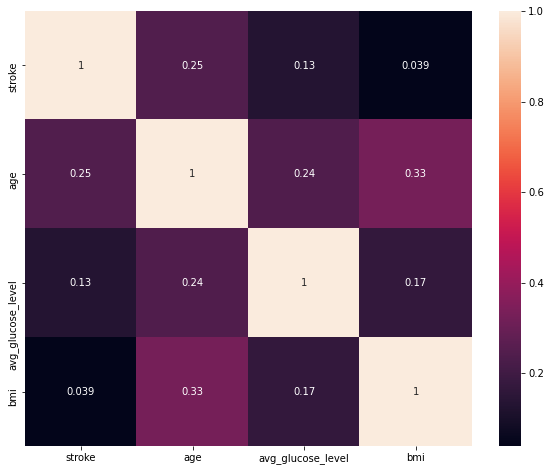

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_result[['stroke', 'age', 'avg_glucose_level', 'bmi']].corr(),annot=True)

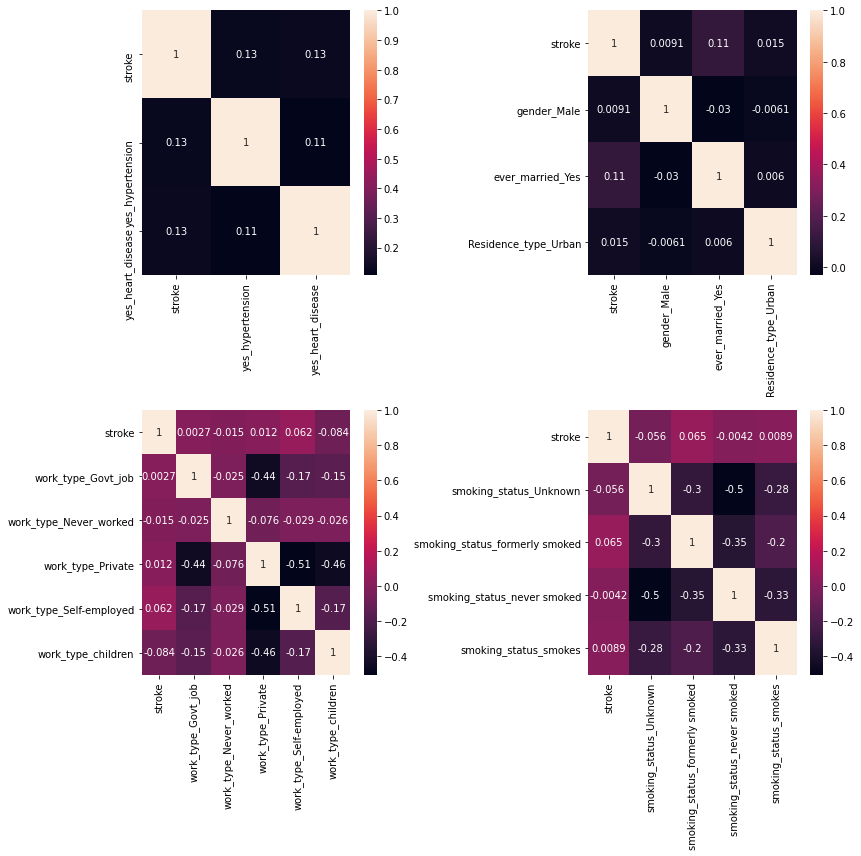

In [17]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

# the "no_" attributes is the opposite to the "yes_" attributes so the correlation to stroke will be the same but negative.
sns.heatmap(df_result[['stroke', 'yes_hypertension', 'yes_heart_disease']].corr(),annot=True, ax=ax1)
sns.heatmap(df_result[['stroke', 'gender_Male', 'ever_married_Yes', 'Residence_type_Urban']].corr(),annot=True, ax=ax2)
sns.heatmap(df_result[['stroke', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']].corr(),annot=True, ax=ax3)
sns.heatmap(df_result[['stroke', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']].corr(),annot=True, ax=ax4)

plt.tight_layout()
plt.show()

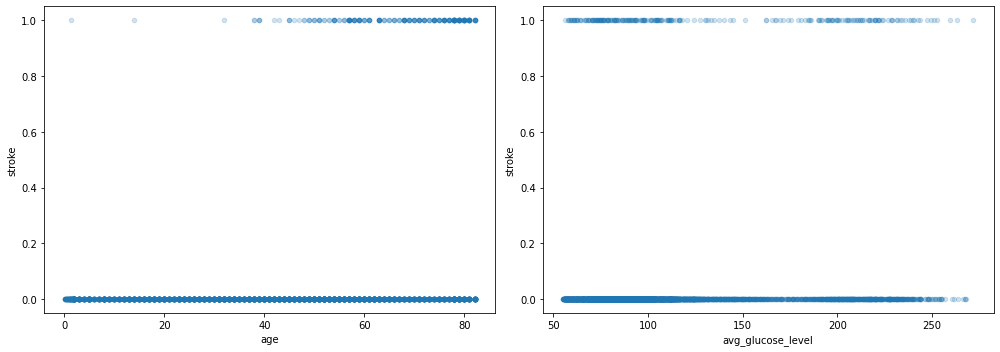

In [18]:
df = df_result

fig, ax = plt.subplots(1,2, figsize = (14,5), )
((ax1, ax2)) = ax

df.plot(ax=ax1, kind='scatter', x='age', y='stroke', alpha = 0.2)
df.plot(ax=ax2, kind='scatter', x='avg_glucose_level', y='stroke', alpha = 0.2)

plt.tight_layout()
plt.show()

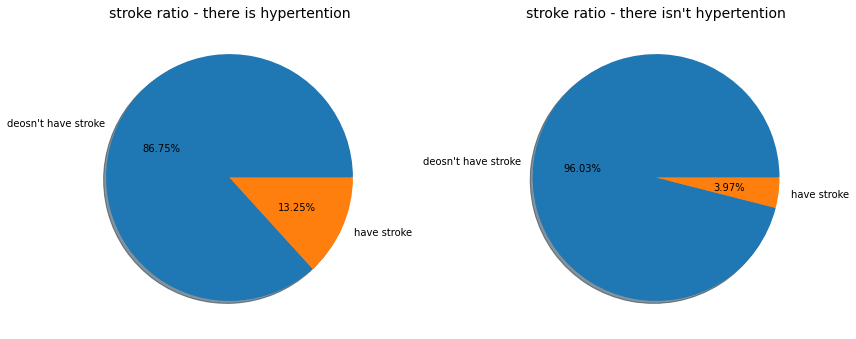

In [19]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[df['yes_hypertension']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - there is hypertention", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[df['no_hypertension']==1]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - there isn't hypertention", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

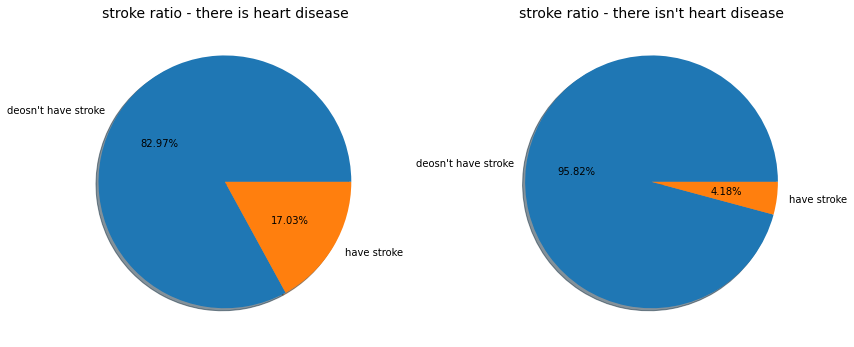

In [20]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[df['yes_heart_disease']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - there is heart disease", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[df['no_heart_disease']==1]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - there isn't heart disease", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

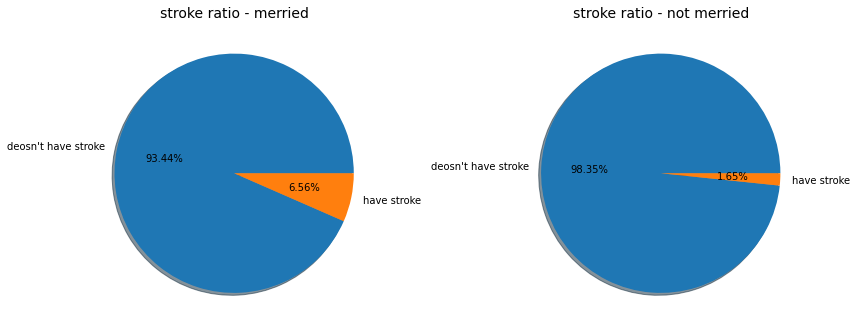

In [21]:
fig, ax = plt.subplots(1,2, figsize = (12,12))
((ax1, ax2)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[df['ever_married_Yes']==1]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - merried", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[df['ever_married_No']==1]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - not merried", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

In [22]:
corr_matrix = df_result.corr()
bmi_corr = corr_matrix["bmi"].sort_values(ascending = False).drop('bmi')
print(bmi_corr[bmi_corr>0.15])
print(bmi_corr[bmi_corr<-0.15])

ever_married_Yes     0.335563
age                  0.325858
work_type_Private    0.204055
avg_glucose_level    0.168910
yes_hypertension     0.160147
Name: bmi, dtype: float64
no_hypertension          -0.160147
smoking_status_Unknown   -0.265094
ever_married_No          -0.335563
work_type_children       -0.442945
Name: bmi, dtype: float64


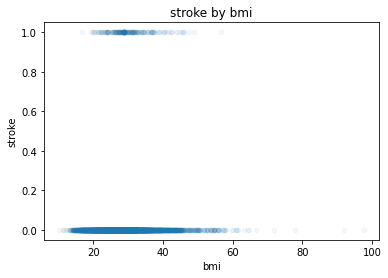

In [23]:
df.plot.scatter( x='bmi', y='stroke', alpha = 0.05, title="stroke by bmi")

In [24]:
values_30plusminusBMI = df[(df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
values_stroke = df['stroke'].value_counts().tolist()

print("-+30bmi without stroke cases : all wothiut stroke cases (ratio) = " + str(values_30plusminusBMI[0]/values_stroke[0]))
print("-+30bmi : all observations (ratio) = " + str(sum(values_30plusminusBMI)/sum(values_stroke)))
print("-+30bmi with stroke cases : all stroke cases (ratio) = " + str(values_30plusminusBMI[1]/values_stroke[1]))
print("as we can see, among 1/2 of the stroke cases the bmi is around 30. In contrast to cases where there is no stroke where the ratio is significantly lower, only 1/3.")

-+30bmi without stroke cases : all wothiut stroke cases (ratio) = 0.3228395061728395
-+30bmi : all observations (ratio) = 0.33235466823253085
-+30bmi with stroke cases : all stroke cases (ratio) = 0.5180722891566265
as we can see, among 1/2 of the stroke cases the bmi is around 30. In contrast to cases where there is no stroke where the ratio is significantly lower, only 1/3.


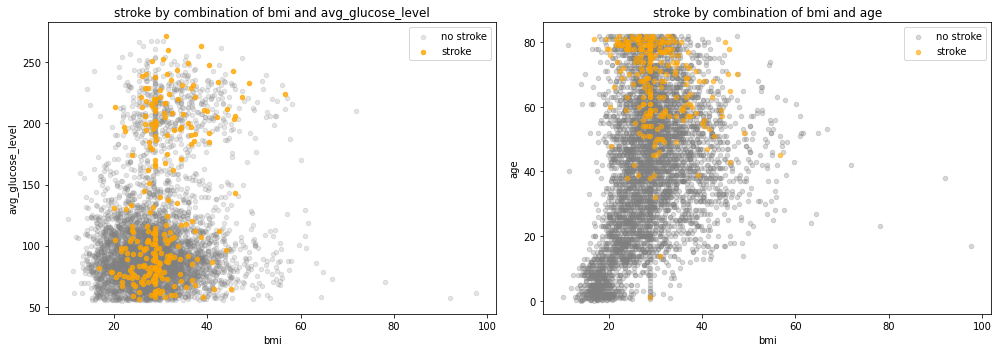

In [25]:
df = df_result

fig, ax = plt.subplots(1,2, figsize = (14,5))
((ax1, ax2)) = ax

df[df['stroke'] ==0].plot.scatter(ax=ax1, x='bmi', y='avg_glucose_level', alpha = 0.2, c='gray', label='no stroke')
df[df['stroke'] ==1].plot.scatter(ax=ax1, x='bmi', y='avg_glucose_level', alpha = 0.8, c='orange', label='stroke')
ax1.legend()
ax1.set_title('stroke by combination of bmi and avg_glucose_level')

df[df['stroke'] ==0].plot.scatter(ax=ax2, x='bmi', y='age', alpha = 0.3, c='gray', label='no stroke')
df[df['stroke'] ==1].plot.scatter(ax=ax2, x='bmi', y='age', alpha = 0.6, c='orange', label='stroke')
ax2.legend()
ax2.set_title('stroke by combination of bmi and age')

plt.tight_layout()
plt.show()

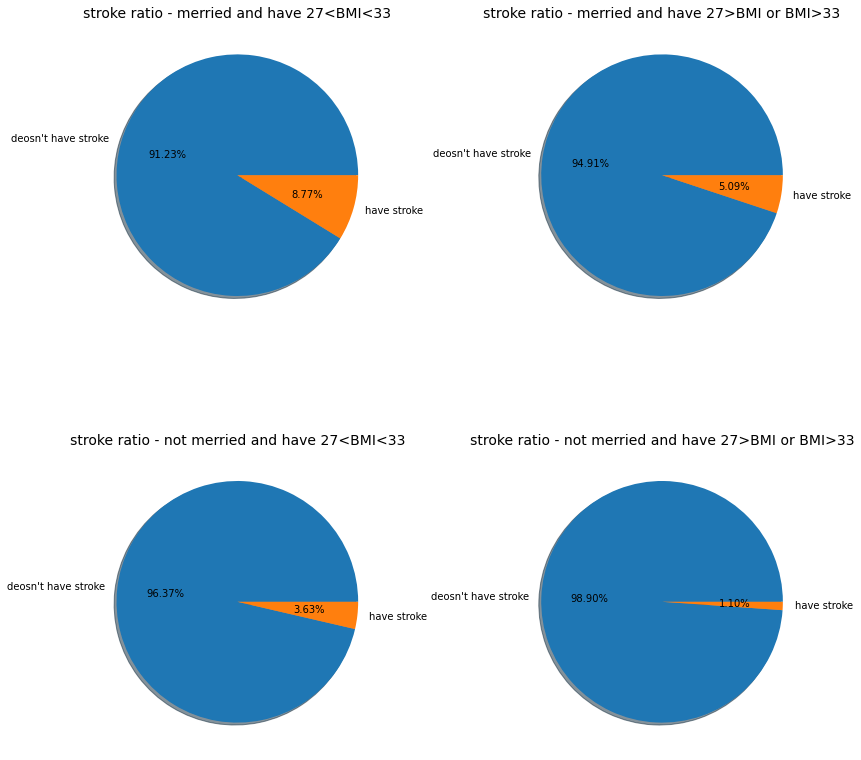

In [26]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['ever_married_Yes']==1) & (df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - merried and have 27<BMI<33", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['ever_married_Yes']==1) & ((df['bmi']<27) | (df['bmi']>33))]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - merried and have 27>BMI or BMI>33", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['ever_married_No']==1) & (df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("stroke ratio - not merried and have 27<BMI<33", fontdict={'fontsize': 14})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['ever_married_No']==1) & ((df['bmi']<27) | (df['bmi']>33))]['stroke'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("stroke ratio - not merried and have 27>BMI or BMI>33", fontdict={'fontsize': 14})

plt.tight_layout()
plt.show()

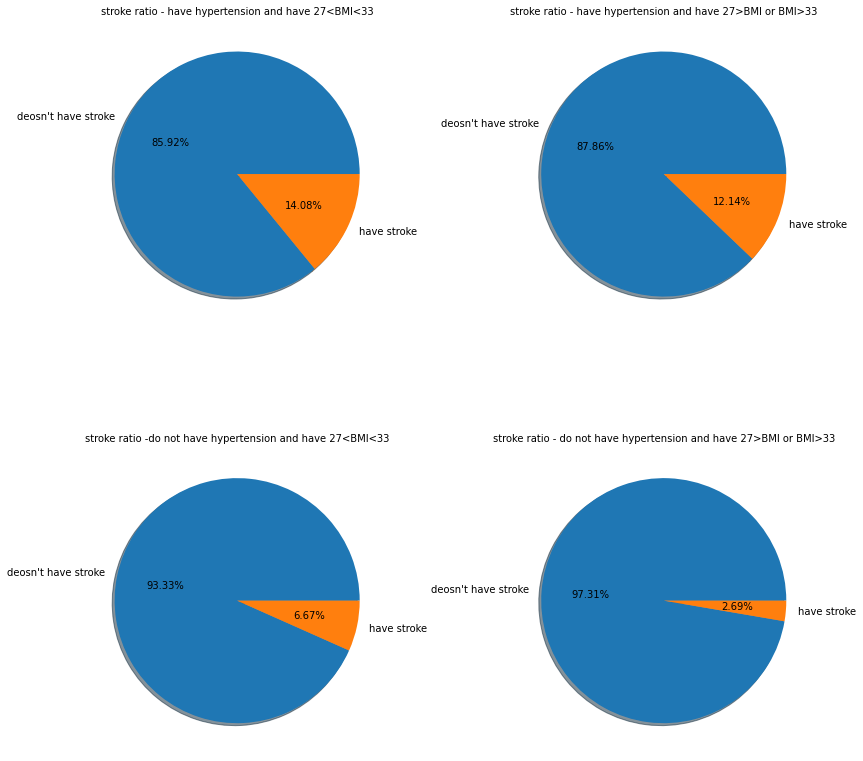

In [27]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['yes_hypertension']==1) & (df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - have hypertension and have 27<BMI<33", fontdict={'fontsize': 10})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['yes_hypertension']==1) & ((df['bmi']<27) | (df['bmi']>33))]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - have hypertension and have 27>BMI or BMI>33", fontdict={'fontsize': 10})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['no_hypertension']==1) & (df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("stroke ratio -do not have hypertension and have 27<BMI<33", fontdict={'fontsize': 10})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['no_hypertension']==1) & ((df['bmi']<27) | (df['bmi']>33))]['stroke'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("stroke ratio - do not have hypertension and have 27>BMI or BMI>33", fontdict={'fontsize': 10})

plt.tight_layout()
plt.show()

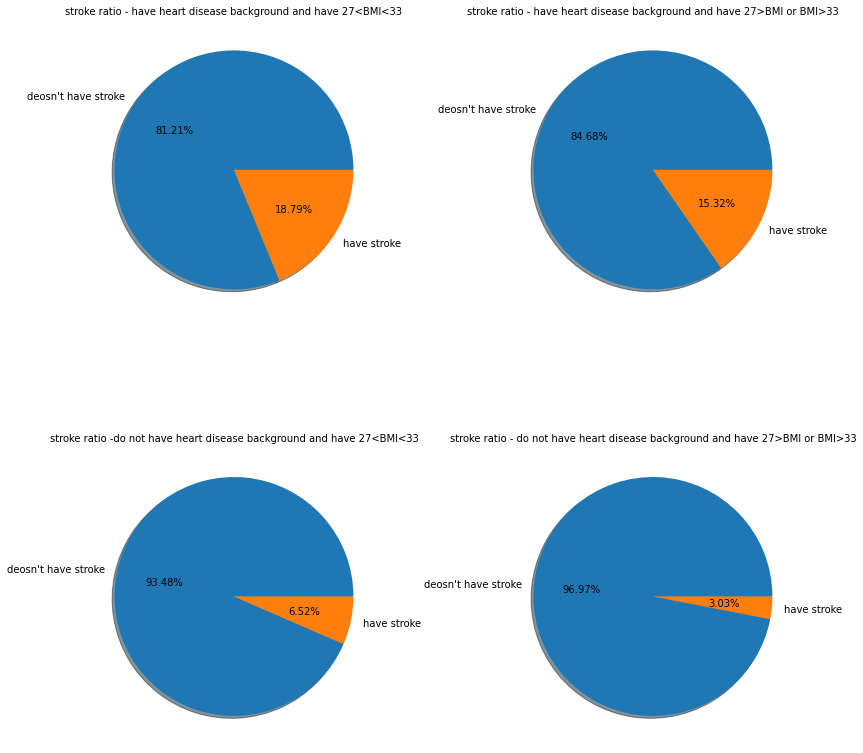

In [28]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
((ax1, ax2), (ax3, ax4)) = ax

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['yes_heart_disease']==1) & (df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("stroke ratio - have heart disease background and have 27<BMI<33", fontdict={'fontsize': 10})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['yes_heart_disease']==1) & ((df['bmi']<27) | (df['bmi']>33))]['stroke'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("stroke ratio - have heart disease background and have 27>BMI or BMI>33", fontdict={'fontsize': 10})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['no_heart_disease']==1) & (df['bmi']>27) & (df['bmi']<33)]['stroke'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("stroke ratio -do not have heart disease background and have 27<BMI<33", fontdict={'fontsize': 10})

labels = ["deosn't have stroke", "have stroke"]
values = df[(df['no_heart_disease']==1) & ((df['bmi']<27) | (df['bmi']>33))]['stroke'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("stroke ratio - do not have heart disease background and have 27>BMI or BMI>33", fontdict={'fontsize': 10})

plt.tight_layout()
plt.show()

In [29]:
X = df.drop(columns=['stroke', 'id'])
Y = df['stroke']
split = StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2)
for train_index, test_index in split.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}

In [30]:
print(y_train.describe()[:3], y_test.describe()[:3])

count    4087.000000
mean        0.048691
std         0.215248
Name: stroke, dtype: float64 count    1022.000000
mean        0.048924
std         0.215814
Name: stroke, dtype: float64


In [31]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [32]:
scaler.fit(X_train[['age', 'avg_glucose_level', 'bmi']])
X_train_scaled[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_train_scaled[['age', 'avg_glucose_level', 'bmi']])

X_train_scaled.describe()

,age,avg_glucose_level,bmi,no_hypertension,yes_hypertension,no_heart_disease,yes_heart_disease,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,4.087000e+03,4.087000e+03,4.087000e+03,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,-2.022958e-16,2.486661e-16,-2.352127e-16,0.905310,0.094690,0.943235,0.056765,0.586494,0.413506,0.340103,0.659897,0.129190,0.003915,0.568632,0.162466,0.135796,0.497431,0.502569,0.302422,0.174945,0.371911,0.150722
std,1.000122e+00,1.000122e+00,1.000122e+00,0.292823,0.292823,0.231422,0.231422,0.492522,0.492522,0.473801,0.473801,0.335451,0.062454,0.495328,0.368923,0.342614,0.500055,0.500055,0.459363,0.379966,0.483374,0.357821
min,-1.907260e+00,-1.134397e+00,-2.402337e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.065280e-01,-6.366512e-01,-6.635186e-01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.688480e-02,-3.135136e-01,-6.236568e-02,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.836150e-01,1.822176e-01,5.064672e-01,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.711198e+00,3.712554e+00,8.883825e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
X_test_scaled[['age', 'avg_glucose_level', 'bmi']] = scaler.transform(X_test_scaled[['age', 'avg_glucose_level', 'bmi']])

In [34]:
def cf_matrix_show(cf_matrix, beta = 4):

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

    accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
    precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
    recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    fb_score  = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}\nFb Score={:0.3f}".format(
                    accuracy,precision,recall,f1_score, fb_score)

    plt.ylabel('True label')
    plt.xlabel('Predicted label' + stats_text)

Text(0, 0.5, 'Testing Accuracy')

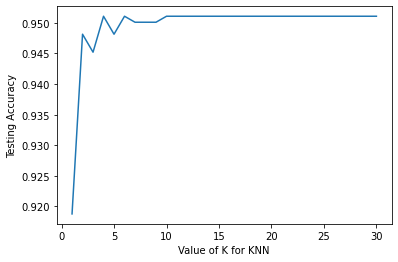

In [35]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [36]:
max_score = max(scores)
best_K = scores.index(max(scores))+1

print("the first k value with best score is " + str(best_K) + " with accuracy of " + str(max_score))

the first k value with best score is 4 with accuracy of 0.9510763209393346


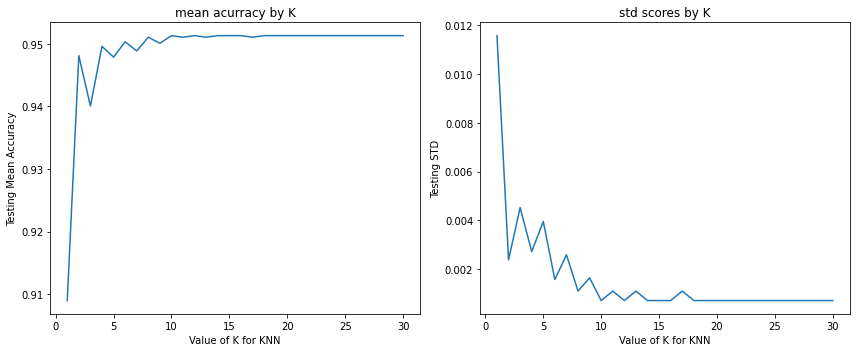

best mean acuarracy is: 0.9513093868354188
the best K's are:
      k_mean     k_std
10  0.951309  0.000709
12  0.951309  0.000709
14  0.951309  0.000709
15  0.951309  0.000709
16  0.951309  0.000709
18  0.951309  0.000709
19  0.951309  0.000709
20  0.951309  0.000709
21  0.951309  0.000709
22  0.951309  0.000709
23  0.951309  0.000709
24  0.951309  0.000709
25  0.951309  0.000709
26  0.951309  0.000709
27  0.951309  0.000709
28  0.951309  0.000709
29  0.951309  0.000709
30  0.951309  0.000709
in this case I will choose the smallest k between those K's for the model, to make it the as simple as we can.


In [37]:
k_range = list(range(1, 31))
k_mean_scores = []
k_std_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    k_mean_scores.append(scores.mean())
    k_std_scores.append(scores.std())

d = {'k_mean': k_mean_scores, 'k_std': k_std_scores}
Ks = pd.DataFrame(data = d, index=k_range)
fig, ax = plt.subplots(1,2, figsize = (12,5))
((ax1, ax2)) = ax

ax1.plot(k_range, k_mean_scores)
ax1.set_title('mean acurracy by K')
ax1.set_xlabel('Value of K for KNN')
ax1.set_ylabel('Testing Mean Accuracy')

ax2.plot(k_range, k_std_scores)
ax2.set_title('std scores by K')
ax2.set_xlabel('Value of K for KNN')
ax2.set_ylabel('Testing STD')

plt.tight_layout()
plt.show()

max_score = max(k_mean_scores)
min_std = min(k_std_scores)
best_Ks = Ks[(Ks['k_mean']==max_score) & (Ks['k_std']==min_std)]
print("best mean acuarracy is: " +str(max_score))
print("the best K's are:")
print(best_Ks)
print("in this case I will choose the smallest k between those K's for the model, to make it the as simple as we can.")

In [38]:
min(best_Ks['k_mean'].index)

10

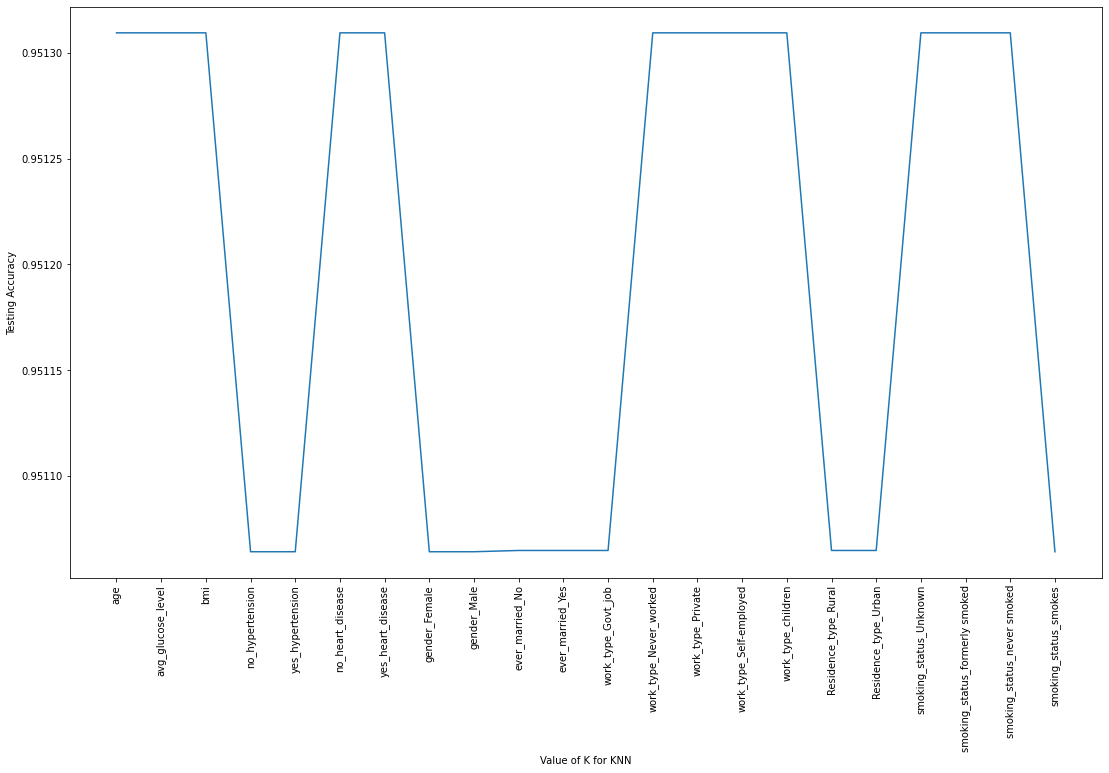

In [39]:
k_range = list(range(1, 31))
k_mean_scores = []
k_std_scores = []

features = list(X_train_scaled.columns.values)
for feature in features:
    knn = KNeighborsClassifier(n_neighbors= min(best_Ks['k_mean'].index))
    scores = cross_val_score(knn, X_train_scaled.drop(columns=feature), y_train, cv=10, scoring='accuracy')
    k_mean_scores.append(scores.mean())
    k_std_scores.append(scores.std())
# check if there is an feature worthe to remove
fig = plt.gcf()
plt.plot(features, k_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.xticks(rotation='vertical')

fig.set_size_inches(18.5, 10.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


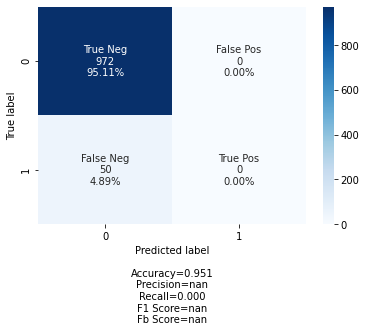

In [40]:
knn = KNeighborsClassifier(n_neighbors=min(best_Ks['k_mean'].index))
knn.fit(X_train_scaled, y_train)
y_predict = knn.predict(X_test_scaled)
cf_matrix_show(confusion_matrix(y_test, y_predict))

here we can se the 95% as false accuracy, without any true positive, so this is useless dummy model.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


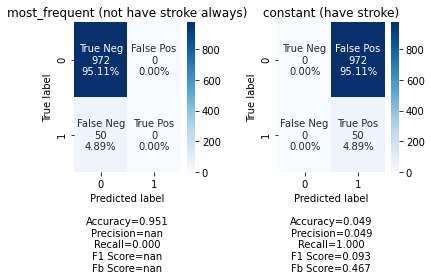

In [44]:
print("here we can se the 95% as false accuracy, without any true positive, so this is useless dummy model.")

plt.subplot(1,2,1)
plt.title('most_frequent (not have stroke always)')
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_scaled, y_train)
y_predict_dummy = dummy_clf.predict(X_test_scaled)
cf_matrix_show(confusion_matrix(y_test, y_predict_dummy))

plt.subplot(1,2,2)
plt.title('constant (have stroke)')
dummy_clf = DummyClassifier(strategy="constant", constant=1)
dummy_clf.fit(X_train_scaled, y_train)
y_predict_dummy = dummy_clf.predict(X_test_scaled)
cf_matrix_show(confusion_matrix(y_test, y_predict_dummy))

plt.tight_layout()
plt.show()

In [47]:
from imblearn.pipeline import make_pipeline

beta = 4
k_range = range(1,180, 15)
kf = KFold(n_splits=5, random_state=42, shuffle=True)

recall_scores = []
precision_scores = []
Fb_scores = []

for k in k_range:
    imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              KNeighborsClassifier(n_neighbors= k))

    
    recall = cross_val_score(imba_pipeline, X_train_scaled, y_train, scoring='recall', cv=kf).mean()
    recall_scores.append(recall)
    precision = cross_val_score(imba_pipeline, X_train_scaled, y_train, scoring='precision', cv=kf).mean()
    precision_scores.append(precision)
    fb_score = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
    Fb_scores.append(fb_score)

pd.set_option('display.max_rows', df.shape[0]+1)    
d = {'Fb': Fb_scores, 'recall': recall_scores, 'precision': precision_scores}
Ks = pd.DataFrame(data = d, index=k_range)
Ks

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

,Fb,recall,precision
1,0.152571,0.158860,0.093410
16,0.487951,0.615098,0.113283
31,0.551157,0.741280,0.107992
46,0.562737,0.771504,0.105588
61,0.593446,0.835345,0.105347
76,0.596587,0.843116,0.105062
91,0.594931,0.847561,0.103124
106,0.595579,0.847450,0.103482
121,0.616510,0.880466,0.106356
136,0.622676,0.886917,0.107974


In [48]:
beta = 4
kf = KFold(n_splits=5, random_state=42, shuffle=True)
k_range = range(1 ,161, 10)
corr_limits = [0, 0.01, 0.02, 0.04, 0.05, 0.06, 0.08, 0.1]

Fb_mean = []
Fb = []

for limit in corr_limits:
    X_tr_copy = X_train_scaled.copy()
    corr_matrix = df_result.corr()
    stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
    s = (stroke_corr < limit)&(stroke_corr>-limit)
    s.drop(labels=['id', 'stroke'], inplace=True)
    X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]

    Fb_scores = []
    
    for k in k_range:
        imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                                  KNeighborsClassifier(n_neighbors= k))

        recall = cross_val_score(imba_pipeline, X_tr_copy, y_train, scoring='recall', cv=kf).mean()
        precision = cross_val_score(imba_pipeline, X_tr_copy, y_train, scoring='precision', cv=kf).mean()
        fb_score = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
        Fb_scores.append(fb_score)
    
    Fb_mean.append(sum(Fb_scores)/len(Fb_scores))
    Fb.append(Fb_scores)
d = {'Fb': Fb_mean}
corr_lim_Fb = pd.DataFrame(data = d, index=corr_limits)
best_corr_lim = corr_lim_Fb['Fb'].idxmax()
best_mean_Fb = corr_lim_Fb['Fb'].max()
print("best correlation limit is: " + str(best_corr_lim) + " , with mean F-beta of " + str(best_mean_Fb))
corr_lim_Fb

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

best correlation limit is: 0.06 , with mean F-beta of 0.5969417115771719


,Fb
0.00,0.554354
0.01,0.572920
0.02,0.590375
0.04,0.593215
0.05,0.593215
0.06,0.596942
0.08,0.591810
0.10,0.591359


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

re-call VS precision score by k:


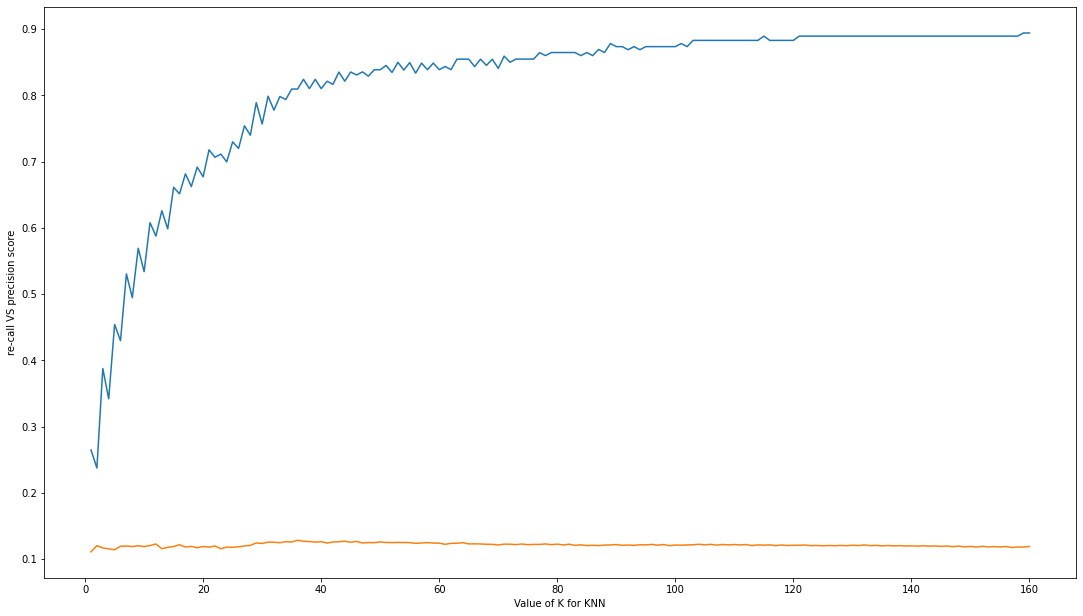

In [49]:
recall_scores = []
precision_scores = []
Fb_scores = []

kf = KFold(n_splits=5, random_state=42, shuffle=True)

limit = best_corr_lim
X_tr_copy = X_train_scaled.copy()
corr_matrix = df_result.corr()
stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
s = (stroke_corr < limit)&(stroke_corr>-limit)
s.drop(labels=['id', 'stroke'], inplace=True)
X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]

k_range = range(1 ,161)
for k in k_range:
    imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              KNeighborsClassifier(n_neighbors= k))
    
    recall = cross_val_score(imba_pipeline, X_tr_copy, y_train, scoring='recall', cv=kf).mean()
    recall_scores.append(recall)
    precision = cross_val_score(imba_pipeline, X_tr_copy, y_train, scoring='precision', cv=kf).mean()
    precision_scores.append(precision)
    fb_score = (1+beta**2)*precision*recall / ((beta**2)*precision + recall)
    Fb_scores.append(fb_score)  

pd.set_option('display.max_rows', df.shape[0]+1)    
d = {'Fb': Fb_scores, 'recall': recall_scores, 'precision': precision_scores}
Ks_best_corr_lim = pd.DataFrame(data = d, index=k_range)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(k_range, recall_scores)
plt.plot(k_range, precision_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('re-call VS precision score')

print("re-call VS precision score by k:")

plt.show()

In [50]:
best_Fb = Ks_best_corr_lim['Fb'].max()
best_K = Ks_best_corr_lim['Fb'].idxmax()
print("best K is: " + str(best_K) + " , with Fbeta of " + str(best_Fb))
Ks_best_corr_lim

best K is: 132 , with Fbeta of 0.6483611302477265


,Fb,recall,precision
1,0.244882,0.264835,0.111034
2,0.224706,0.237573,0.120386
3,0.341243,0.387753,0.116898
4,0.306638,0.341982,0.115556
5,0.386487,0.454177,0.114188
6,0.372854,0.429741,0.119580
7,0.441509,0.530575,0.119784
8,0.417211,0.494608,0.119078
9,0.466680,0.569207,0.120218
10,0.443106,0.533927,0.119064


In [51]:
print("here it is:")
Ks_best_corr_lim.loc[[best_K]]

here it is:


,Fb,recall,precision
132,0.648361,0.889363,0.121513


In [52]:
best_imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              KNeighborsClassifier(n_neighbors= best_K))

limit = best_corr_lim
X_tr_copy = X_train_scaled.copy()
corr_matrix = df_result.corr()
stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
s = (stroke_corr < limit)&(stroke_corr>-limit)
s.drop(labels=['id', 'stroke'], inplace=True)
X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]

predict_probability = cross_val_predict(best_imba_pipeline, X_tr_copy, y_train, cv=kf, method='predict_proba')
predict_probability

# keep probabilities for the positive outcome only
stroke_prob = predict_probability[:, 1]
precision, recall, thresholds = precision_recall_curve(y_train, stroke_prob)
# convert to f-beta score
fb_score = ((1+beta**2) * precision * recall) / ((beta**2)*precision + recall)
# locate the index of the largest fb score
np.nan_to_num(fb_score, nan=0, copy=False)
ix = fb_score.argmax(axis=0)

print('Best Threshold = %f with Fb-Score of %.3f' % (thresholds[ix], fb_score[ix]))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Best Threshold = 0.575758 with Fb-Score of 0.652


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


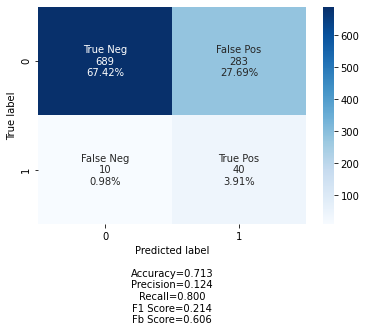

In [53]:
best_imba_pipeline = make_pipeline(SMOTE(random_state=42), 
                              KNeighborsClassifier(n_neighbors= best_K))
limit = best_corr_lim
X_tr_copy = X_train_scaled.copy()
X_test_copy = X_test_scaled.copy()
corr_matrix = df_result.corr()
stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
s = (stroke_corr < limit)&(stroke_corr>-limit)
s.drop(labels=['id', 'stroke'], inplace=True)
X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]
X_test_copy = X_test_copy[X_test_copy.columns[~s]]

best_imba_pipeline.fit(X_tr_copy, y_train)
y_prob = best_imba_pipeline.predict_proba(X_test_copy)
# keep probabilities for the positive outcome only
y_prob = y_prob[:, 1]
y_predict = np.where(y_prob < thresholds[ix], 0, 1)

cf_matrix_show(confusion_matrix(y_test, y_predict), beta=4)

In [55]:
limit = best_corr_lim
X_tr_copy = X_train_scaled.copy()
X_test_copy = X_test_scaled.copy()
corr_matrix = df_result.corr()
stroke_corr = corr_matrix["stroke"].sort_values(ascending = False)
s = (stroke_corr < limit)&(stroke_corr>-limit)
s.drop(labels=['id', 'stroke'], inplace=True)
X_tr_copy = X_tr_copy[X_tr_copy.columns[~s]]
X_test_copy = X_test_copy[X_test_copy.columns[~s]]
from imblearn.pipeline import Pipeline

imba_pipeline = Pipeline([
    ('sampling', SMOTE(random_state=42)), 
    ('classification', KNeighborsClassifier())])